<h1>Fluorometer Analysis</h1>

In [1]:
import Tools
from importlib import reload
reload(Tools)

data = Tools.Fluorescence()
data.UI()

Box(children=(Text(value='', description='Filter:', placeholder='Type something', style=DescriptionStyle(descr…

SelectMultiple(description='Runs', layout=Layout(width='80%'), options=('',), rows=20, style=DescriptionStyle(…

Dropdown(description='Background Run', layout=Layout(width='80%'), options=('None',), style=DescriptionStyle(d…

Box(children=(Button(description='Plot', style=ButtonStyle()), Button(description='Copy Plot Data', style=Butt…

IntSlider(value=0, continuous_update=False, description='Lower Limit:', max=0)

IntSlider(value=0, continuous_update=False, description='Upper Limit:', max=0)

Box(children=(Button(description='Integrate', style=ButtonStyle()), Button(description='Save Plot', style=Butt…

Output()

Output()

Text(0, 0.5, 'CaM Concentration (μM)')

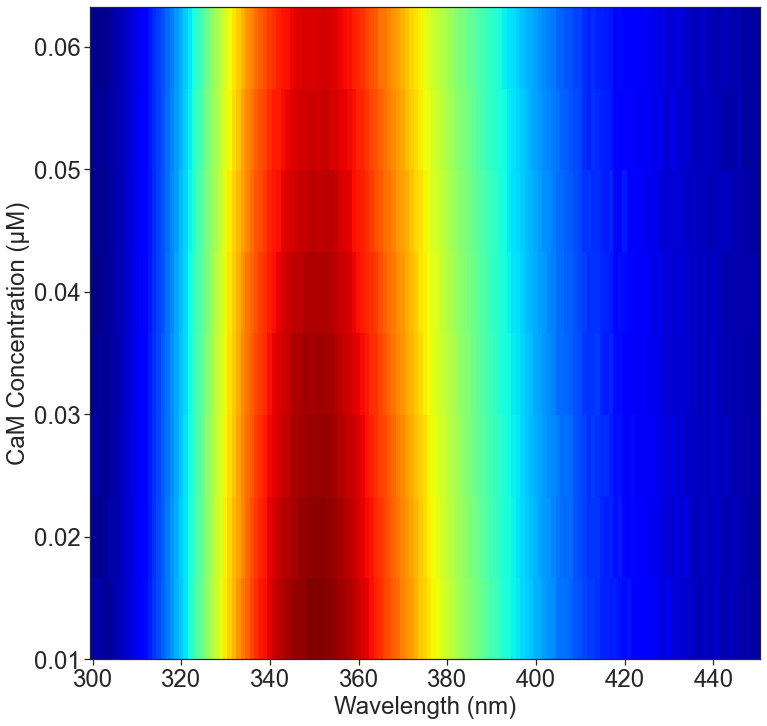

In [2]:
import os
import sys
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from pylab import rc
import seaborn as sns
from scipy import integrate
from scipy.interpolate import interp1d

# Data formatting
symbols = ['.','+','x','^','*','_','o']
linestyle = ['solid','dotted','dashed','dashdot',(0,(3,3,1,3,1,3)),(0,(1,5)),(0,(5,10))]
colors = ['black','blue','red','green','orange','purple','gray']
markersize = 100
fontsize = 24

cmap = 'jet'

# setup plot
sns.set_theme(style="ticks")
fig = plt.figure(figsize=(12,12))

def xyz(Data) :
    x = Data.index.values
    y = Data.columns.values
    z = np.transpose(Data.values)
    return x,y,z

Data = data.Spectra
Data = Data.set_index('X')

# Extract concentrations from filenames
y = list()
for column in Data.columns :
    split = column.split('_')
    if len(split) < 4 :
        y.append(0)
    else :
        value = float(split[3])
        conc = 50
        vol = 1500
        value = conc * value / (vol + value)
        y.append(value)
Data.columns = y

vmin, vmax = 0, np.max(Data.values)

ax = fig.add_subplot(1, 1, 1)
x,y,z = xyz(Data)

plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
pcm = plt.pcolor(x, y, z, cmap=cmap,shading='auto',vmin=vmin,vmax=vmax)
# plt.plot(peaks,y,color='black')
ax.tick_params(axis='x',which='both',labelsize=fontsize)
ax.tick_params(
    axis='y',
    which='both',
    left=True,
    labelleft=True,
    right=False,
    labelright=False,
    labelsize=fontsize)
plt.xlabel('Wavelength (nm)',fontsize=fontsize)
plt.ylabel('CaM Concentration (μM)',fontsize=fontsize)